# **Lista 7 - Visualização de dados**

#### **Fala devs, beleza?**
Bem vindos à ultima lista de exercícios do nosso curso! Aqui serão abordados assuntos envolvendo o tema de "Visualização de dados". <br><br>Usaremos um *dataset* de dados de uma certa clínica médica, em que cada observação corresponde a um paciente.

<h3> Importando os dados

Antes de iniciar o processo de visualização, é necessário que importemos os dados do arquivo .csv, bem como as bibliotecas que iremos utilizar:

In [6]:
### Importando as bibliotecas
# Caso precise instalar alguma biblioteca use: %pip install nome_da_biblioteca
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [7]:
### Carregando o dataset
data = pd.read_csv("dataset_dev.csv")

Uma vez importados, podemos buscar entender a estrutura dos dados e a forma como foram organizados, por meio da exploração dos mesmos:

In [3]:
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  country  previous_cancellations  booking_changes  days_in_waiting_list  \
0     PRT                       0                3                     0   
1     PRT                       0                4                     0   
2     GBR                       0                0                     0   
3     GBR                       0                0                     0   
4     GBR                       0                0                     0   

    adr  required_car_parking_spaces  total_of_special_requests  \
0   0.0                            0                          0   
1   0.0                            0                          0   
2  75.0                            0                          0   
3  75.0                            0                          0   
4  98.0                            0                          1   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118898 entries, 0 to 118897
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        118898 non-null  object 
 1   is_canceled                  118898 non-null  int64  
 2   lead_time                    118898 non-null  int64  
 3   arrival_date_year            118898 non-null  int64  
 4   arrival_date_month           118898 non-null  object 
 5   arrival_date_week_number     118898 non-null  int64  
 6   arrival_date_day_of_month    118898 non-null  int64  
 7   stays_in_weekend_nights      118898 non-null  int64  
 8   stays_in_week_nights         118898 non-null  int64  
 9   adults                       118898 non-null  int64  
 10  children                     118898 non-null  float64
 11  babies                       118898 non-null  int64  
 12  country                      118898 non-null  object 
 13 

In [5]:
data.shape

(118898, 20)

Breve descrição das colunas: <br><br>

**hotel**: Tipo de hotel (Resort Hotel ou City Hotel).

**is_canceled**: Indica se a reserva foi cancelada (0 para não cancelada, 1 para cancelada).

**lead_time**: Número de dias entre a data da reserva e a data de chegada.

**arrival_date_year**: Ano da data de chegada.

**arrival_date_month**: Mês da data de chegada.

**arrival_date_week_number**: Número da semana do ano da data de chegada.

**arrival_date_day_of_month**: Dia do mês da data de chegada.

**stays_in_weekend_nights**: Número de noites de estadia durante os fins de semana.

**stays_in_week_nights**: Número de noites de estadia durante os dias de semana.

**adults**: Número de adultos.

**children**: Número de crianças.

**babies**: Número de bebês.

**country**: País de origem.

**previous_cancellations**: Número de reservas canceladas anteriormente pelo cliente.

**booking_changes**: Número de alterações feitas na reserva.

**days_in_waiting_list**: Número de dias na lista de espera antes da confirmação da reserva.

**adr**: Tarifa média diária (Average Daily Rate).

**required_car_parking_spaces**: Número de vagas de estacionamento necessárias.

**total_of_special_requests**: Número total de pedidos especiais feitos pelo cliente.

**reservation_status_date**: Data da última atualização do status da reserva.

A partir dessas informações, já podemos iniciar o processo de visualização de dados. E assim sendo, agora é com vocês!!

# Exercícios

<h2> Questão 1

#### Faça um gráfico que relacione a quantidade de dias de antecedência da reserva com a tarifa média diária:

In [6]:
### REMOÇÃO DOS OUTLIERS ###
from scipy import stats
z_scores = stats.zscore(data['adr'])
threshold = 3
data = data[(z_scores < threshold)]

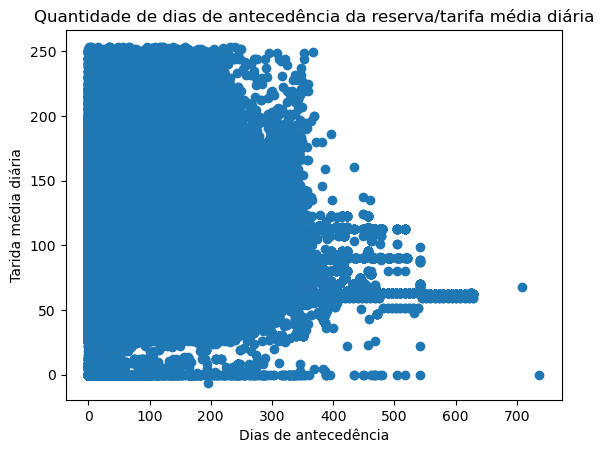

In [7]:
### SEU CÓDIGO COMEÇA AQUI ###

lead_time = data['lead_time']
adr = data['adr']

lead_time

plt.scatter(lead_time,adr)
plt.xlabel('Dias de antecedência')
plt.ylabel('Tarida média diária')
plt.title('Quantidade de dias de antecedência da reserva/tarifa média diária')
plt.show()

In [8]:
lead_time

0         342
1         737
2           7
3          13
4          14
         ... 
118893     23
118894    102
118895     34
118896    109
118897    205
Name: lead_time, Length: 117762, dtype: int64

## Questão 2

#### a) Faça um gráfico para analisar a quantidade de hoteis de cada tipo na amostra

In [46]:
### SEU CÓDIGO COMEÇA AQUI ###
hotéis = data.groupby('hotel').size()

hotéis.index = ['City Hotel', 'Resort Hotel']
hotéis

City Hotel      79007
Resort Hotel    38755
dtype: int64

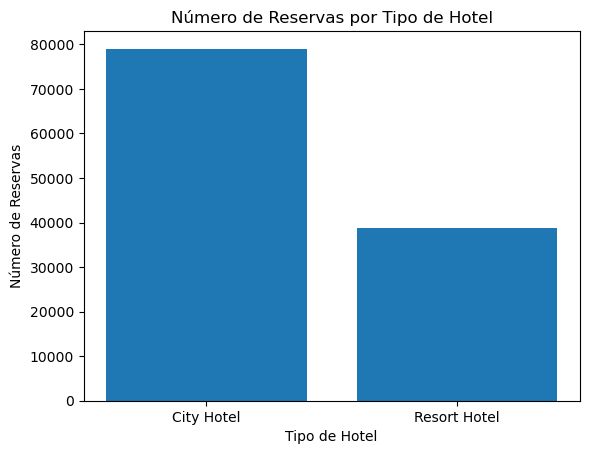

In [47]:
plt.bar(hotéis.index, hotéis.values)

plt.xlabel('Tipo de Hotel')
plt.ylabel('Número de Reservas')
plt.title('Número de Reservas por Tipo de Hotel')

plt.show()

#### b) Agora, faça um gráfico para analisar a quantidade de reservas canceladas para cada tipo de hotel
dica: dê uma olhada na função ```.countplot()``` do *Seaborn*

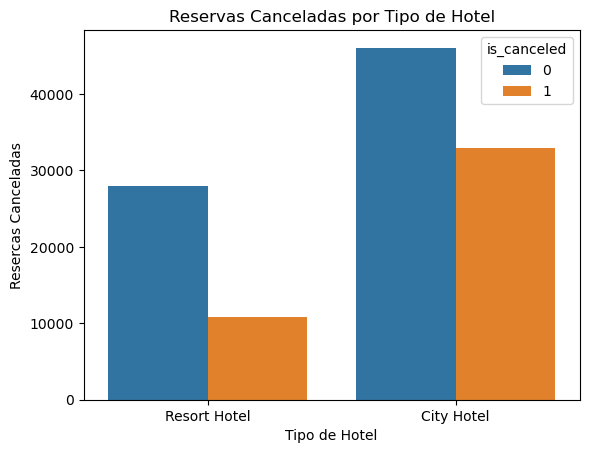

In [11]:
### SEU CÓDIGO COMEÇA AQUI ###
sns.countplot(data=data, hue='is_canceled', x='hotel')
plt.xlabel('Tipo de Hotel')
plt.ylabel('Resercas Canceladas')
plt.title('Reservas Canceladas por Tipo de Hotel')
plt.show()

## Questão 3

### a) Faça um gráfico que demonstre a quantidade de noites de estadia durante os fins de semana, dividindo o gráfico em 20 intervalos distintos: <br> 
Dica: tente utilizar o parâmetro '*bins*' do matplotlib para selecionar a quantidade de grupos que deseja utilizar

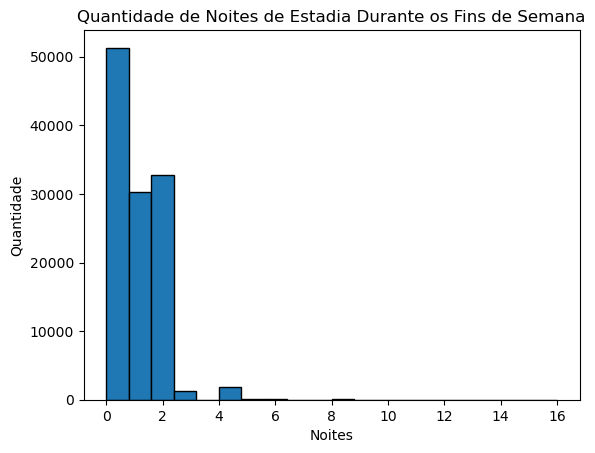

In [13]:
### SEU CÓDIGO COMEÇA AQUI ###
plt.hist(data['stays_in_weekend_nights'], bins=20,edgecolor='black')
plt.xlabel('Noites')
plt.ylabel('Quantidade')
plt.title('Quantidade de Noites de Estadia Durante os Fins de Semana')
plt.show()

### b) Agora, faça a mesma coisa para as estadias em dias da semana:

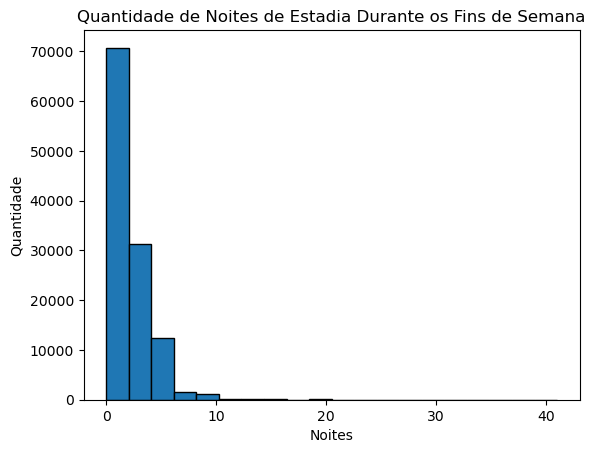

In [14]:
### SEU CÓDIGO COMEÇA AQUI ###
plt.hist(data['stays_in_week_nights'], bins=20, edgecolor='black')
plt.xlabel('Noites')
plt.ylabel('Quantidade')
plt.title('Quantidade de Noites de Estadia Durante os Fins de Semana')
plt.show()

### c) Por fim, relacione o número de dias de estadia nos fins de semana e nos dias de semana, diferenciando-os pelo tipo de hotel (ou seja, city hotel ou resort hotel):

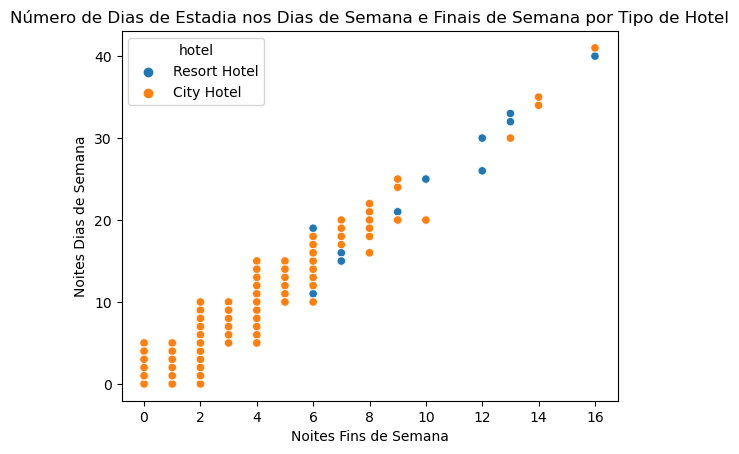

In [15]:
### SEU CÓDIGO COMEÇA AQUI ###
sns.scatterplot(x='stays_in_weekend_nights', y='stays_in_week_nights', data=data, hue='hotel')
plt.xlabel('Noites Fins de Semana')
plt.ylabel('Noites Dias de Semana')
plt.title('Número de Dias de Estadia nos Dias de Semana e Finais de Semana por Tipo de Hotel')
plt.show()

## Questão 4

### a) Faça um gráfico que nos permita ver a evolução temporal das taxas médias diárias ao decorrer dos meses do ano
Dica: neste exercício, pode-se fazer útil o uso do parâmetro '*errorbar*' da biblioteca seaborn para refinar o seu gráfico

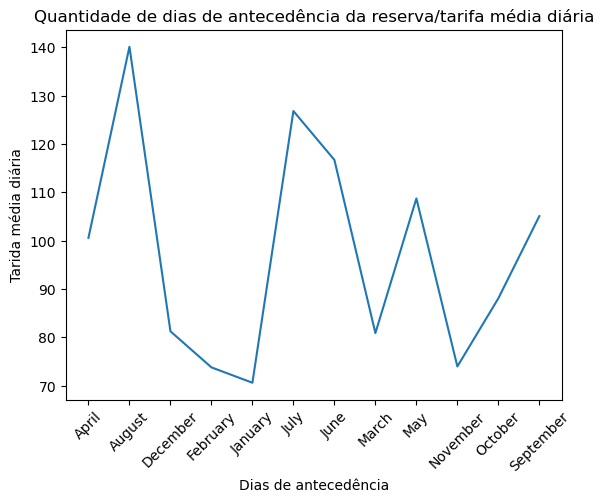

In [94]:
### SEU CÓDIGO COMEÇA AQUI ###
dias = data.groupby('arrival_date_month')['adr'].mean().reset_index()

dias = pd.DataFrame(dias)

dias

plt.plot(dias['arrival_date_month'],dias['adr'])
plt.xlabel('Dias de antecedência')
plt.xticks(fontsize=10, rotation=45)
plt.ylabel('Tarifa média diária')
plt.title('Quantidade de dias de antecedência da reserva/tarifa média diária')
plt.show()

### b) Faça um gráfico que nos permita ver a evolução temporal das taxas médias diárias ao decorrer dos anos

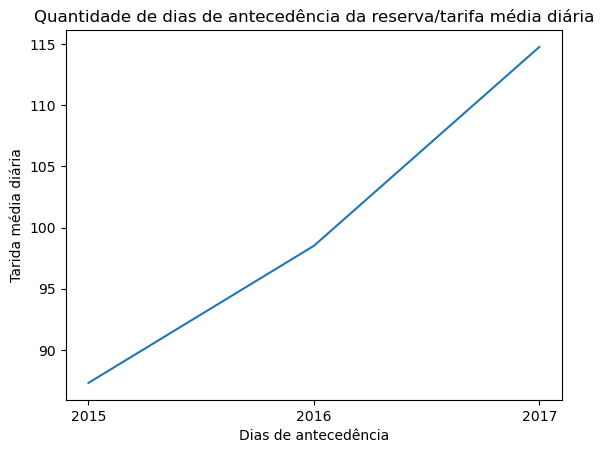

In [110]:
### SEU CÓDIGO COMEÇA AQUI ###
### SEU CÓDIGO COMEÇA AQUI ###
anos = data.groupby('arrival_date_year')['adr'].mean().reset_index()

anos = pd.DataFrame(anos)

anos

plt.plot(anos['arrival_date_year'],anos['adr'])
plt.xlabel('Dias de antecedência')
plt.xticks(anos['arrival_date_year'][:3],fontsize=10, rotation=0)
plt.ylabel('Tarida média diária')
plt.title('Quantidade de dias de antecedência da reserva/tarifa média diária')
plt.show()

## Questão 5

### Faça um gráfico que nos permita analisar a correlação entre todas as colunas numéricas ao mesmo tempo

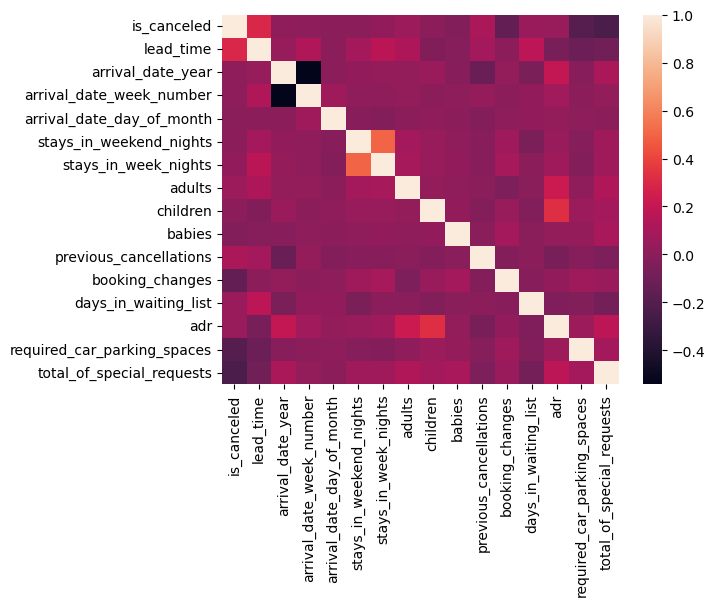

In [5]:
### SEU CÓDIGO COMEÇA AQUI ###

numeros = data.select_dtypes(include=np.number)

correlação = numeros.corr()

sns.heatmap(correlação)

plt.show()

## Questão 6

### Faça um gráfico interativo e dinâmico da distribuição do número de dias entre a data da reserva e a da chegada, e do tipo de hotel

In [9]:
### SEU CÓDIGO COMEÇA AQUI ###

px.box(data_frame=data, x='lead_time', y='hotel')